In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

%matplotlib inline

In [110]:
## 데이터 불러오기

xlsx = pd.read_excel('../../data/Real estate valuation data set.xlsx')
data = xlsx.to_csv('../../data/Real_Estate.csv')
df = pd.read_csv('../../data/Real_Estate.csv')

In [111]:
## 데이터 기본 정보 확인

df
print(df)
print(df.keys())

,Unnamed: 0,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...,...
409,409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


     Unnamed: 0   No  X1 transaction date  X2 house age  \
0             0    1          2012.916667          32.0   
1             1    2          2012.916667          19.5   
2             2    3          2013.583333          13.3   
3             3    4          2013.500000          13.3   
4             4    5          2012.833333           5.0   
..          ...  ...                  ...           ...   
409         409  410          2013.000000          13.7   
410         410  411          2012.666667           5.6   
411         411  412          2013.250000          18.8   
412         412  413          2013.000000           8.1   
413         413  414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450        

<br/>
<br/>

### 변수 정리


- 독립변수 : X1 ~ X6까지 6개 
- 종속변수 : Y house price of unit area

<br/>
<br/>

## EDA작업

In [112]:
# 1. DataFrame 변환
# 1-1 먼저 공백을 제거한 키값(컬럼명)으로 바꾸자. 

df.rename({'X1 transaction date' : 'transaction_date',
           'X2 house age': 'house_age',
           'X3 distance to the nearest MRT station' : 'distance_nearest_MRT',
           'X4 number of convenience stores': 'convenience_stores',
           'X5 latitude' : 'latitude',
           'X6 longitude' : 'longitude',
           'Y house price of unit area' : 'house_price'},
         axis = 1, inplace = True)

df

,Unnamed: 0,No,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...,...
409,409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [113]:
# 2-1. Feature 테이블 만들기 (독립변수 테이블 만들기)

features = df.iloc[:, 2:8]
features

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [114]:
# 2-2. Target 테이블 만들기 (종속변수 테이블 만들기)

targets = pd.DataFrame(df.house_price, columns = ["house_price"])
targets

,house_price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [115]:
# 2-3. features와 targets통합시키기

estate = pd.concat([features, targets], axis = 1)
estate

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [116]:
# 2-4. null값 확인

features.isna().sum(axis = 0)

transaction_date        0
house_age               0
distance_nearest_MRT    0
convenience_stores      0
latitude                0
longitude               0
dtype: int64

In [117]:
# 2-5. 기초통계분석

features.info()
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_date      414 non-null    float64
 1   house_age             414 non-null    float64
 2   distance_nearest_MRT  414 non-null    float64
 3   convenience_stores    414 non-null    int64  
 4   latitude              414 non-null    float64
 5   longitude             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270


In [118]:
# 2-6. 상관분석

corr = features.corr()
corr

corr2 = estate.corr()
corr2
# house_age와 transaction_date 다중공선성 주의

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520
distance_nearest_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317
convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000


,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_nearest_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [119]:
# 2-7. 집계분석

estate.groupby('house_price').size()

house_price
7.6      1
11.2     1
11.6     1
12.2     1
12.8     2
        ..
71.0     1
73.6     1
78.0     1
78.3     1
117.5    1
Length: 270, dtype: int64

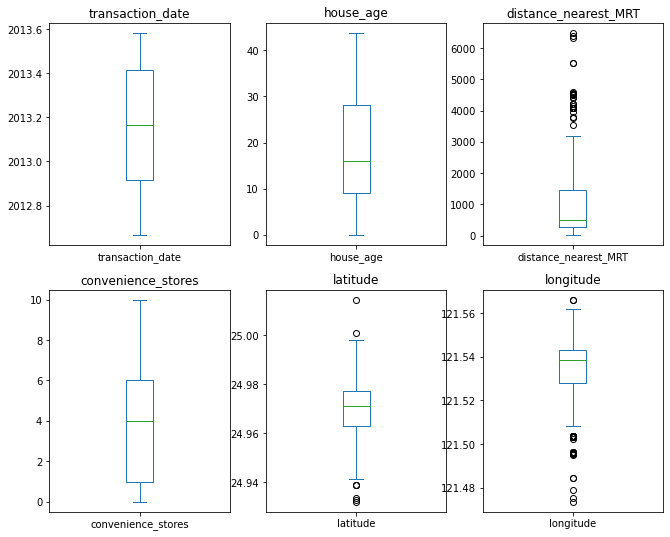

In [120]:
# 2-8. 이상치 탐지 그래프 -boxplot

def boxplot_estate(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9)) #사이즈
    
    for col in features.columns: # X변수에 해당하는 그래프 개수를 그려내자.
        plt.subplot(2,3,i) # 두 줄에 두칸을 만들어서 인덱스 순으로 그려내자.
        plt.axis('on') # 축 표시해라
        plt.tick_params(axis='both',left =True)
        dataset[col].plot(kind='box', subplots=True) # 얘를 통으로 넣어줘도 위에서 feature_names만큼으로 정해서 species안들어온다. # 그래프 선택
        plt.title(col)
        i +=1

    plt.show()
boxplot_estate(estate.columns[:-1],estate)

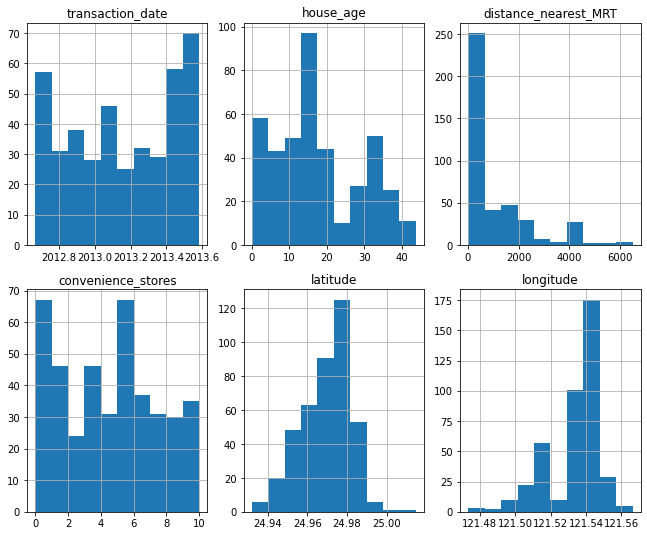

In [121]:
# 2-8-2. 이상치 탐지 그래프 확인 - histogram

def histogram_estate(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9)) #사이즈
    
    for col in features.columns: # X변수에 해당하는 그래프 개수를 그려내자.
        plt.subplot(2,3,i) # 두 줄에 두칸을 만들어서 인덱스 순으로 그려내자.
        plt.axis('on') # 축 표시해라
        plt.tick_params(axis='both',left =True)
        
        dataset[col].hist()
        plt.title(col)
        i +=1

    plt.show()
histogram_estate(estate.columns[:-1], estate)

<Figure size 792x648 with 0 Axes>

<AxesSubplot:>

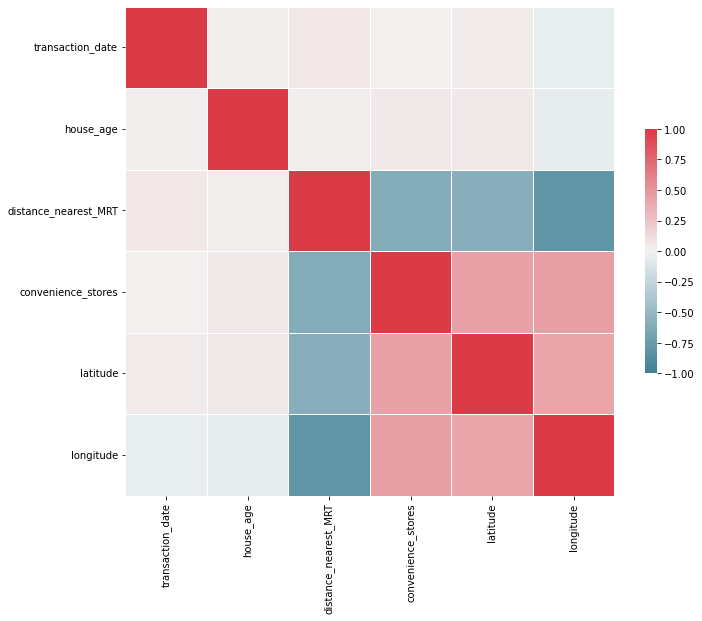

In [122]:
# 2-8-3. 상관관계 시각화

# corr위에 선언되어 있음

cmap = sns.diverging_palette(220, 10, as_cmap = True)

plt.figure(figsize = (11,9))
sns.heatmap(corr, cmap = cmap, vmax = 1.0, vmin = -1.0, center = 0, square = True, linewidths = .5, cbar_kws = {'shrink' : .5})
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

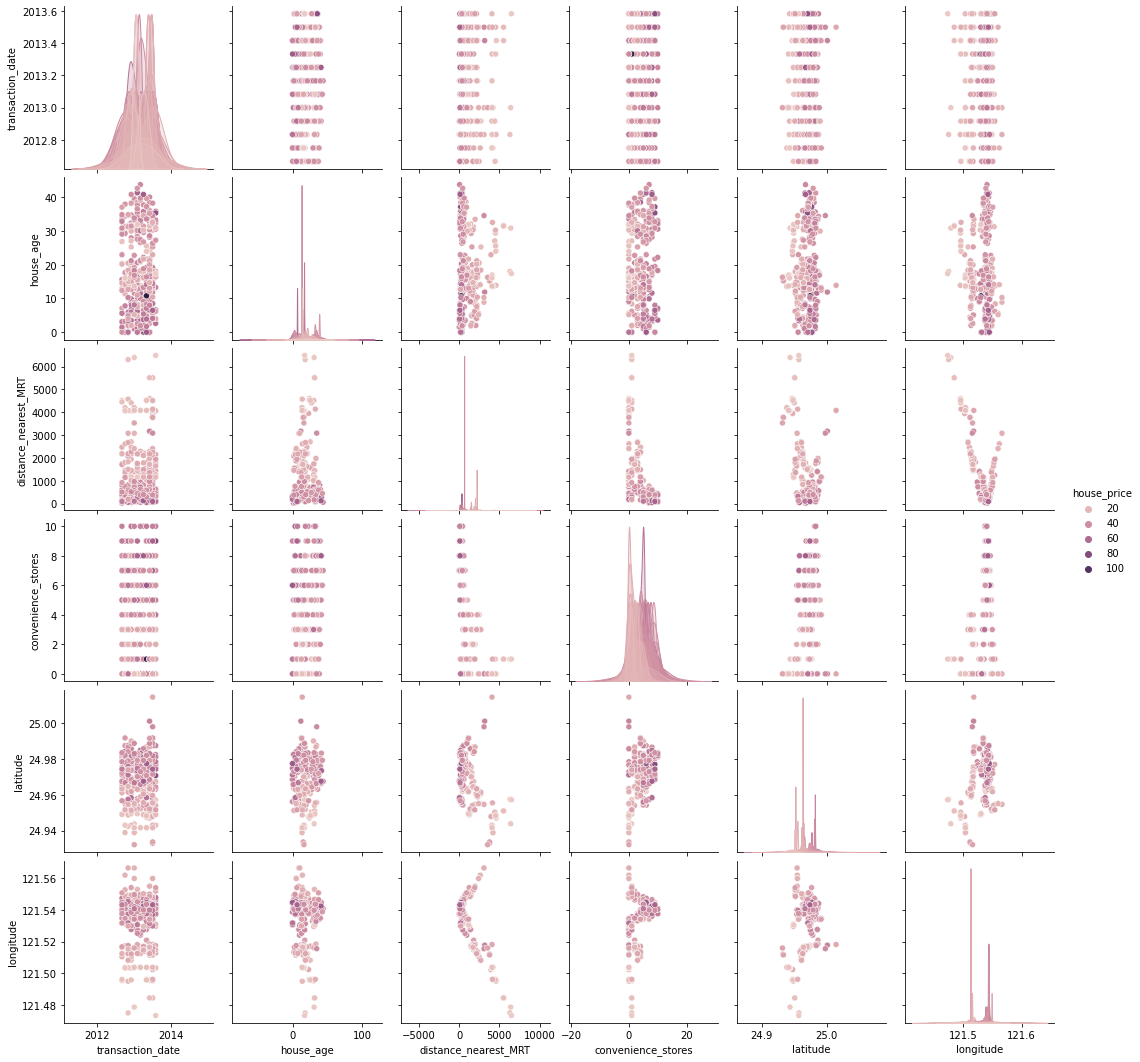

In [123]:
# 2-8-4. 상관관계 시각화 - pairplot

sns.pairplot(estate, hue = 'house_price')
plt.subtitle("House Price Multivariate Distribution")
plt.show()

In [91]:
a = estate.iloc[:, :-1]
b= estate.iloc[:,-1]
a
b
x = estate.iloc[:,1:5]
x

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house_price, Length: 414, dtype: float64

,house_age,distance_nearest_MRT,convenience_stores,latitude
0,32.0,84.87882,10,24.98298
1,19.5,306.59470,9,24.98034
2,13.3,561.98450,5,24.98746
3,13.3,561.98450,5,24.98746
4,5.0,390.56840,5,24.97937
...,...,...,...,...
409,13.7,4082.01500,0,24.94155
410,5.6,90.45606,9,24.97433
411,18.8,390.96960,7,24.97923
412,8.1,104.81010,5,24.96674


In [108]:
typech = estate.astype({'house_price' : 'int'})
typech

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52


In [149]:
# 2-9 홀드아웃

from sklearn.model_selection import train_test_split

# 사용할 특징량 추출
tych = estate.astype({'house_price' : 'int'})

x = tych.iloc[:,1:5]
y = tych.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [150]:
# 3-1. 정규화

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)


print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

x_train_std mean :  6.920306621656246e-14
x_train_std std:  1.0
x_test_std mean:  0.02615155757872515
x_test_std std:  1.0096374097002767


In [161]:
# 4-1. 모형 구축

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [162]:
# 4-2. 모형 실행

model.fit(x_train_std, y_train)

LinearRegression()

In [163]:
# 4-3. 모형 저장
import joblib

joblib.dump(model, '1111_workshop')

['1111_workshop']

In [164]:
# 4-4. 모형활용

pred = model.predict(x_test_std)
pred

array([47.53838562, 41.77927162, 43.89526122, 40.75047426, 29.8251794 ,
       42.96476016, 45.93557005, 45.85668077, 24.52413552, 52.01145487,
       31.80911997, 34.19520959, 38.95398382, 24.62775613, 35.71677467,
       32.45727107, 42.12161179, 46.72416886, 31.07084081, 44.56388123,
        1.80041717, 33.1442961 , 47.62841251, 43.52591333, 13.64325696,
       40.7150743 , 14.29275036, 43.89526122, 36.17923135, 37.91124001,
       11.20033634, 38.61961477, 37.95509237, 28.77462877, 45.9196403 ,
       31.27400154, 52.19552985, 14.72970227, 46.99162978, 40.6770754 ,
       36.118256  , 40.45289393, 48.54313346, 39.59846231, 41.83186447,
       48.25564937, 45.22372802, 24.16857648, 49.79366417, 48.30063936,
       47.53838562, 48.42758599, 41.02720897, 42.60147958, 36.26148476,
       14.70340584, 35.14333732, 36.60894387, 29.74629012, 45.85668077,
       33.14235582, 32.19990634, 14.70340584, 11.41372152,  8.12277346,
       33.17059252, 29.93235392, 45.4643237 , 34.06236213, 30.64

In [165]:
model.score(x_test_std, y_test)

0.5826556703815733